In [1]:
import jax
import jax.numpy as jnp
from jax import grad
jax.config.update('jax_platform_name', 'cpu')

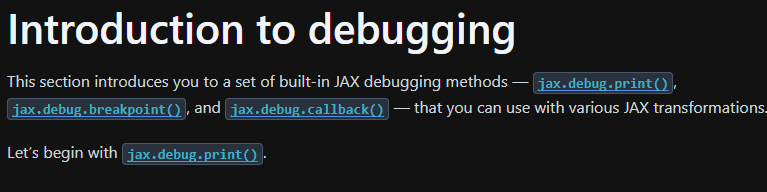

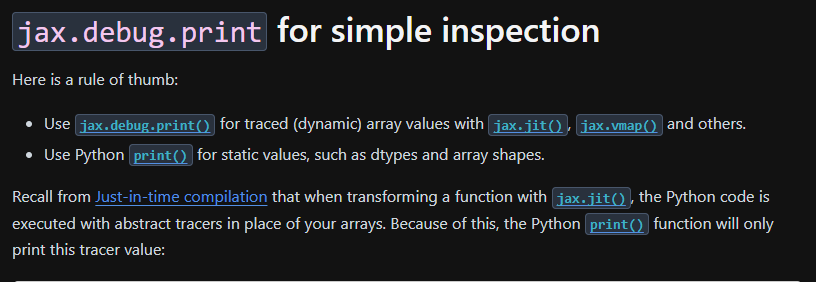

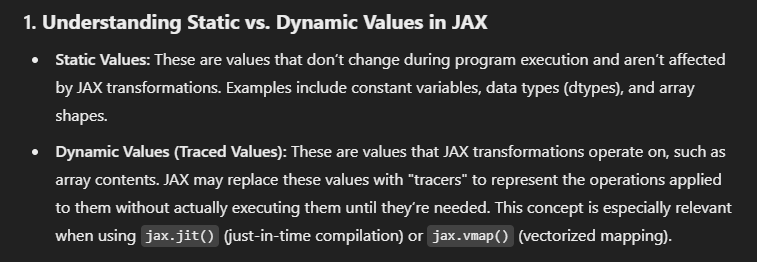

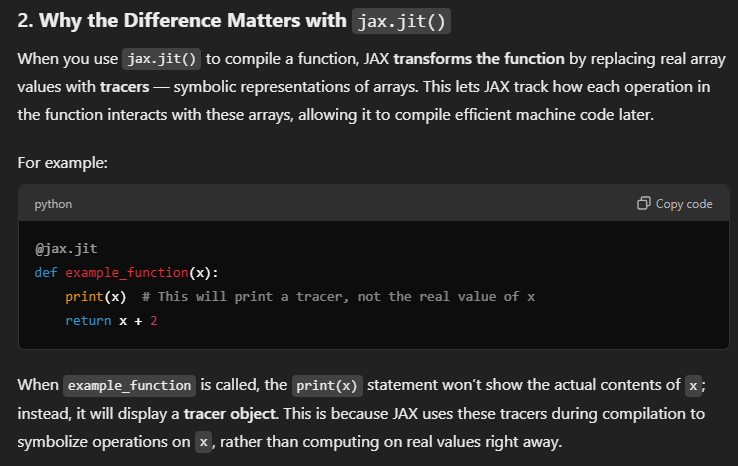

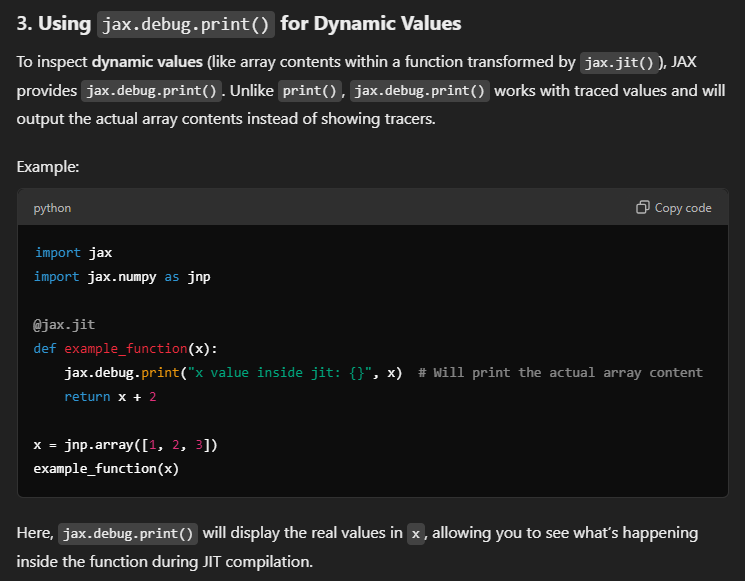

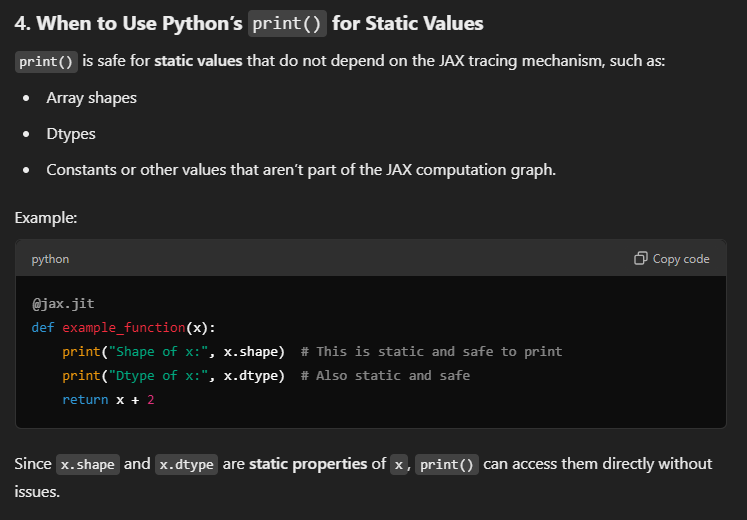

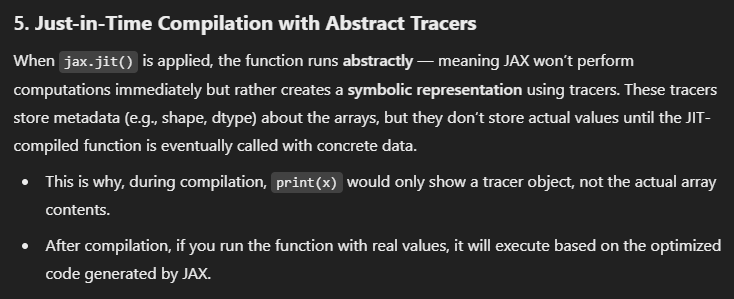

In [2]:
@jax.jit
def f(x):
  print("print(x) ->", x)
  y = jnp.sin(x)
  print("print(y) ->", y)
  return y

In [3]:
result = f(2.)


print(x) -> Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace(level=1/0)>
print(y) -> Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace(level=1/0)>


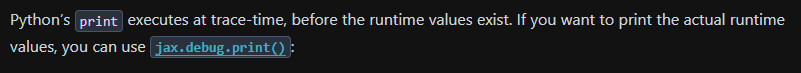

In [4]:
@jax.jit
def f(x):
  jax.debug.print("jax.debug.print(x) -> {x}", x=x)
  y = jnp.sin(x)
  jax.debug.print("jax.debug.print(y) -> {y}", y=y)
  return y

result = f(2.)

jax.debug.print(x) -> 2.0
jax.debug.print(y) -> 0.9092974066734314


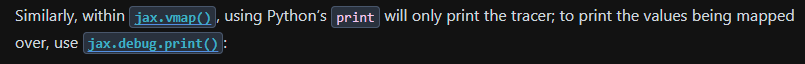

In [5]:
def f(x):
  jax.debug.print("jax.debug.print(x) -> {}", x)
  y = jnp.sin(x)
  jax.debug.print("jax.debug.print(y) -> {}", y)
  return y

xs = jnp.arange(3.)

result = jax.vmap(f)(xs)

jax.debug.print(x) -> 0.0
jax.debug.print(x) -> 1.0
jax.debug.print(x) -> 2.0
jax.debug.print(y) -> 0.0
jax.debug.print(y) -> 0.8414709568023682
jax.debug.print(y) -> 0.9092974066734314


In [6]:
result = jax.lax.map(f, xs)

jax.debug.print(x) -> 0.0
jax.debug.print(y) -> 0.0
jax.debug.print(x) -> 1.0
jax.debug.print(y) -> 0.8414709568023682
jax.debug.print(x) -> 2.0
jax.debug.print(y) -> 0.9092974066734314


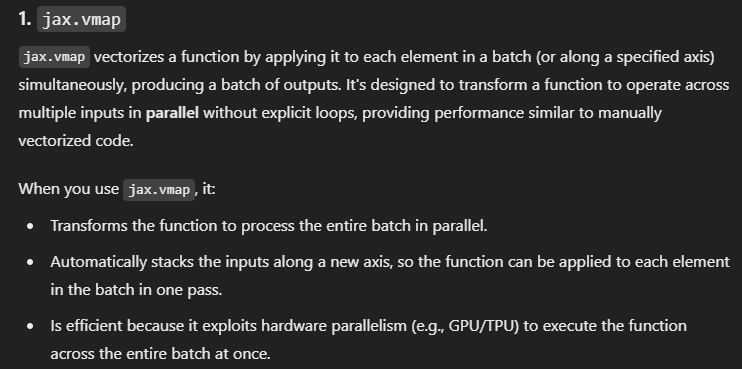

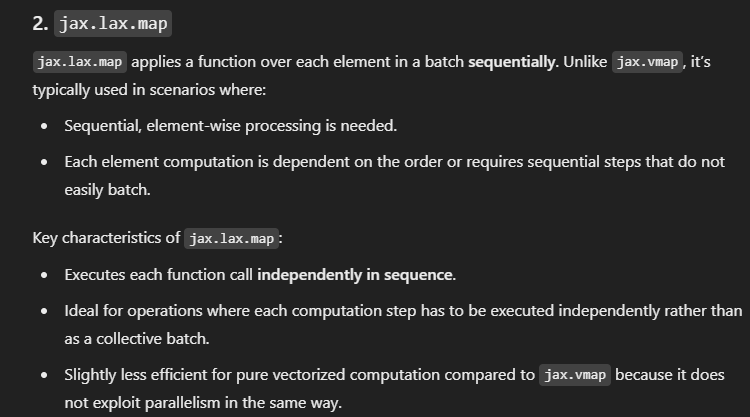

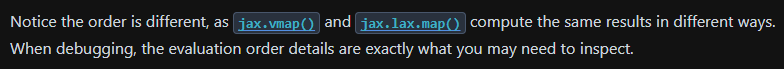

In [7]:
def f(x):
  jax.debug.print("jax.debug.print(x) -> {}", x)
  return x ** 2

result = jax.grad(f)(1.)

jax.debug.print(x) -> 1.0


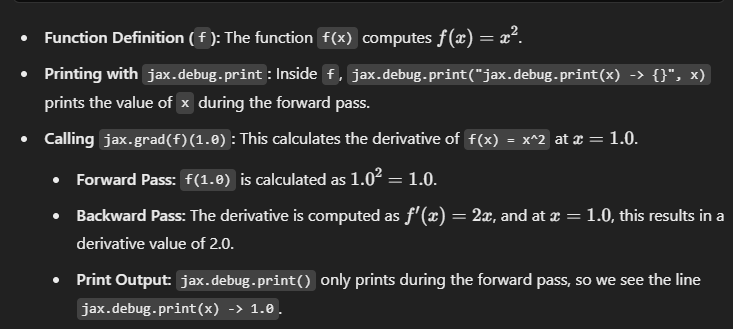

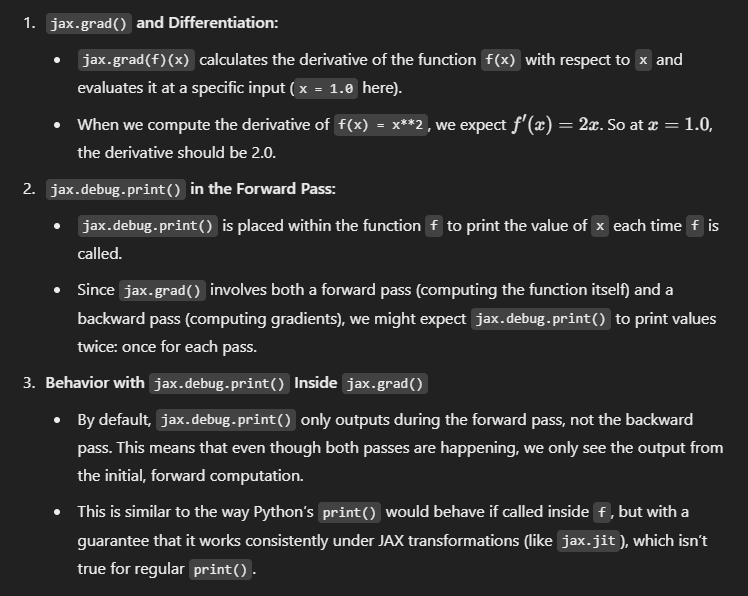

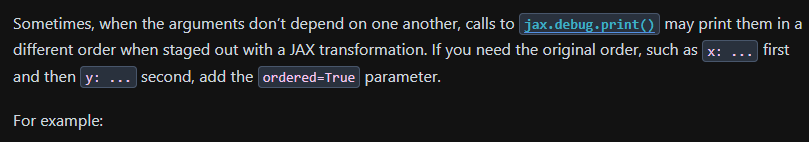
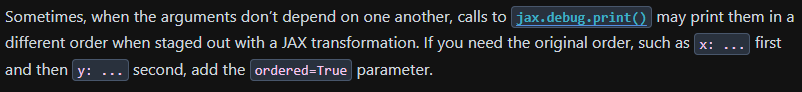

In [8]:
@jax.jit
def f(x, y):
  jax.debug.print("jax.debug.print(x) -> {}", x, ordered=True)
  jax.debug.print("jax.debug.print(y) -> {}", y, ordered=True)
  return x + y

f(1, 2)

jax.debug.print(x) -> 1
jax.debug.print(y) -> 2


Array(3, dtype=int32, weak_type=True)

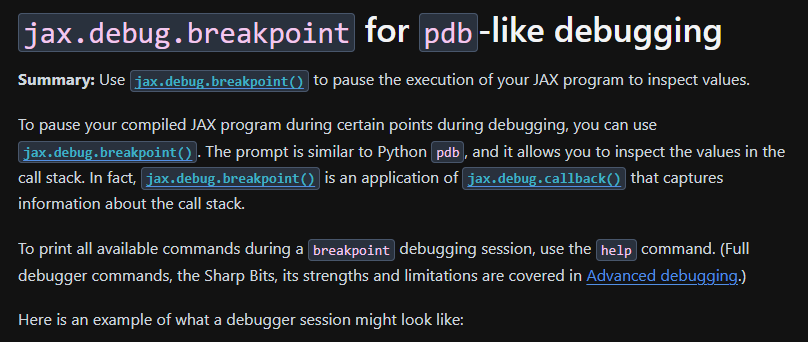

In [ ]:
@jax.jit
def f(x):
  y, z = jnp.sin(x), jnp.cos(x)
  jax.debug.breakpoint()
  return y * z
f(2.) # ==> Pauses during execution

Entering jdb:


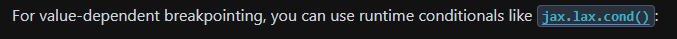

In [9]:
def breakpoint_if_nonfinite(x):
  is_finite = jnp.isfinite(x).all()
  def true_fn(x):
    pass
  def false_fn(x):
    jax.debug.breakpoint()
  jax.lax.cond(is_finite, true_fn, false_fn, x)

@jax.jit
def f(x, y):
  z = x / y
  breakpoint_if_nonfinite(z)
  return z

f(2., 1.) # ==> No breakpoint

Array(2., dtype=float32, weak_type=True)

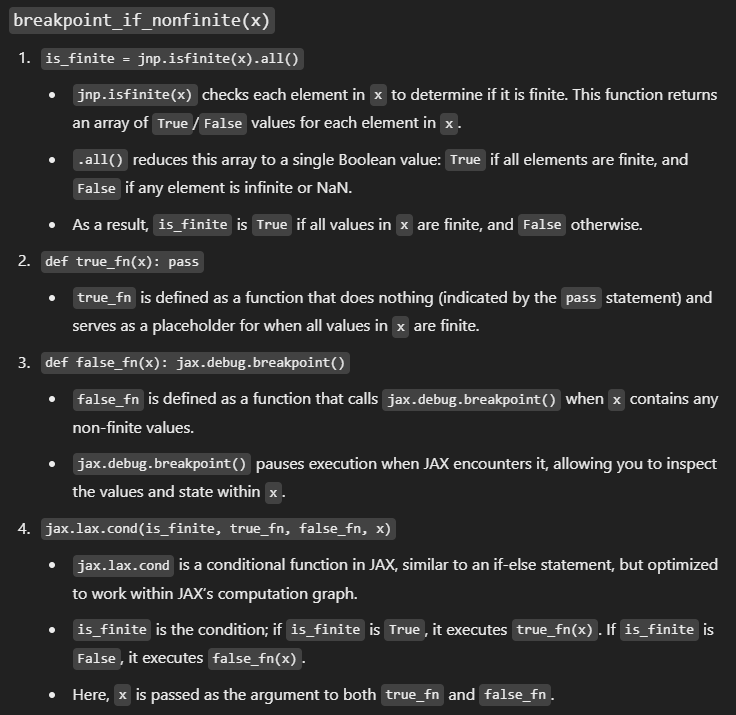

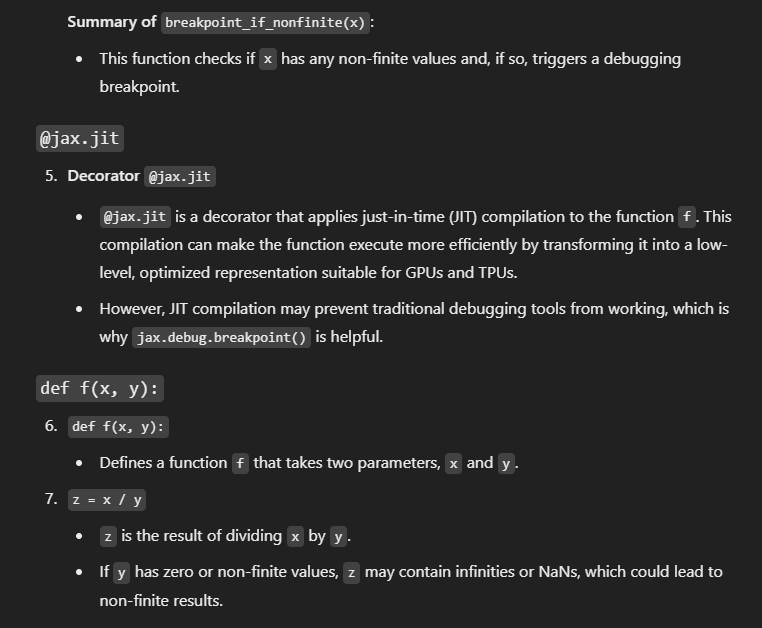

In [ ]:
f(2., 0.) # ==> Pauses during execution

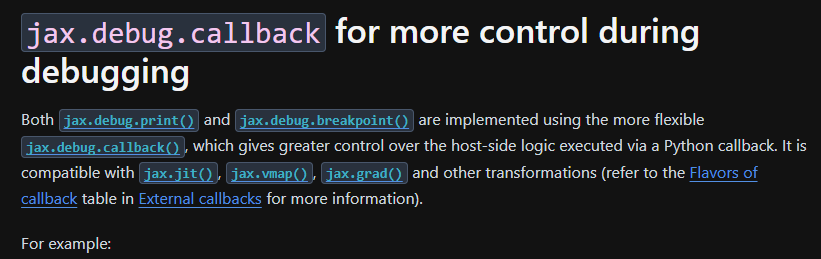

In [10]:
import logging

def log_value(x):
  logging.warning(f'Logged value: {x}')

@jax.jit
def f(x):
  jax.debug.callback(log_value, x)
  return x

f(1.0);

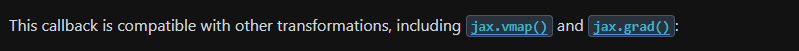

In [11]:
x = jnp.arange(5.0)
jax.vmap(f)(x);

In [12]:
jax.grad(f)(1.0);

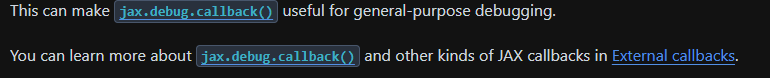